In [ ]:
%pip install qiskit-aer
%pip install seaborn
%pip install pylatexenc


In [1]:
import numpy as np
from quam_libs.components import QuAM, TransmonPair
from quam_libs.experiments.two_qubit_xeb import (
    XEBConfig,
    XEB,
    backend as fake_backend,
    QUAGate,
)

machine = QuAM.load()
qubits = machine.active_qubits
# Get the relevant QuAM components
readout_qubit_indices = [0]  # Indices of the target qubits
readout_qubits = [qubits[i] for i in readout_qubit_indices]
target_qubit_indices = [0,4,1]  # Indices of the target qubits
target_qubits = [qubits[i] for i in target_qubit_indices]
target_qubit_pairs = [
    qubit_pair
    for qubit_pair in machine.active_qubit_pairs
    if qubit_pair.qubit_control in target_qubits and qubit_pair.qubit_target in target_qubits

]

print("target_qubits: %s" %[q.name for q in target_qubits]) 


def cz_gate(qubit_pair: TransmonPair):
    """
    CZ gate QUA macro: Add your own QUA code here implementing your CZ gate for any given qubit pair
    :param qubit_pair: TransmonPair instance on which to apply the gate
    :return: None
    """

    pass


cz_qua = QUAGate("cz", cz_gate)

xeb_config = XEBConfig(
    seqs=9, #81,
    # depths=np.arange(1, 1200, 24),
    depths=np.arange(1, 55, 5),
    n_shots=700, #1000,
    readout_qubits=readout_qubits, 
    qubits=target_qubits,
    qubit_pairs=target_qubit_pairs,
    baseline_gate_name="x90",
    gate_set_choice="sw",
    two_qb_gate=None, #cz_qua,
    save_dir="",
    should_save_data=False, #True,
    generate_new_data=True,
    disjoint_processing=False, #False,
    # reset_method="active",
    # reset_kwargs={"max_tries": 3, "pi_pulse": "x180"},
    reset_method="cooldown", #"active",
    reset_kwargs={"cooldown_time": 100000, "max_tries": 3, "pi_pulse": "x180"},
)

simulate = False  # Set to True to simulate the experiment with Qiskit Aer instead of running it on the QPU
xeb = XEB(xeb_config, quam=machine)
if simulate:
    job = xeb.simulate(backend=fake_backend)
else:
    job = xeb.run(simulate=False)  # If simulate is False, job is run on the QPU, else pulse output is simulated

# 87 * 500/12 * 1000 = 13m 26.8s 
# 87 * 1200/24 * 700 = 22m 42.3s


2024-11-10 19:35:25,291 - qm - INFO     - Starting session: fb98a6bd-8486-4dd1-bb62-820eca9594ed


/Users/adamachuck/anaconda3/envs/QPX-Qualibrate/lib/python3.10/site-packages/quam/core/quam_classes.py:497: UserWarning: No QuamRoot initialized, cannot retrieve reference #/wiring/qubit_pairs/q1-2/c/opx_output from TunableCoupler
  warnings.warn(
/Users/adamachuck/anaconda3/envs/QPX-Qualibrate/lib/python3.10/site-packages/quam/core/quam_classes.py:497: UserWarning: No QuamRoot initialized, cannot retrieve reference #/wiring/qubit_pairs/q2-3/c/opx_output from TunableCoupler
  warnings.warn(
/Users/adamachuck/anaconda3/envs/QPX-Qualibrate/lib/python3.10/site-packages/quam/core/quam_classes.py:497: UserWarning: No QuamRoot initialized, cannot retrieve reference #/wiring/qubit_pairs/q3-4/c/opx_output from TunableCoupler
  warnings.warn(
/Users/adamachuck/anaconda3/envs/QPX-Qualibrate/lib/python3.10/site-packages/quam/core/quam_classes.py:497: UserWarning: No QuamRoot initialized, cannot retrieve reference #/wiring/qubit_pairs/q4-5/c/opx_output from TunableCoupler
  warnings.warn(


target_qubits: ['q1', 'q5', 'q2']
2024-11-10 19:35:26,652 - qm - INFO     - Performing health check
2024-11-10 19:35:26,673 - qm - INFO     - Cluster healthcheck completed successfully.
2024-11-10 19:35:28,987 - qm - INFO     - Adding program to queue.


In [ ]:
job.circuits[7][3].draw("mpl") # job.circuits[seq][depth] 

In [ ]:
job.circuits[7][9].draw("mpl") # job.circuits[seq][depth]

/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:685: RuntimeWarning: divide by zero encountered in scalar divide
  f_xeb = (xe_incoherent - xe_measured) / (xe_incoherent - xe_expected)
/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:685: RuntimeWarning: invalid value encountered in scalar divide
  f_xeb = (xe_incoherent - xe_measured) / (xe_incoherent - xe_expected)
/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:737: RuntimeWarning: invalid value encountered in scalar divide
  fid_lsq = df["numerator"].sum() / df["denominator"].sum()


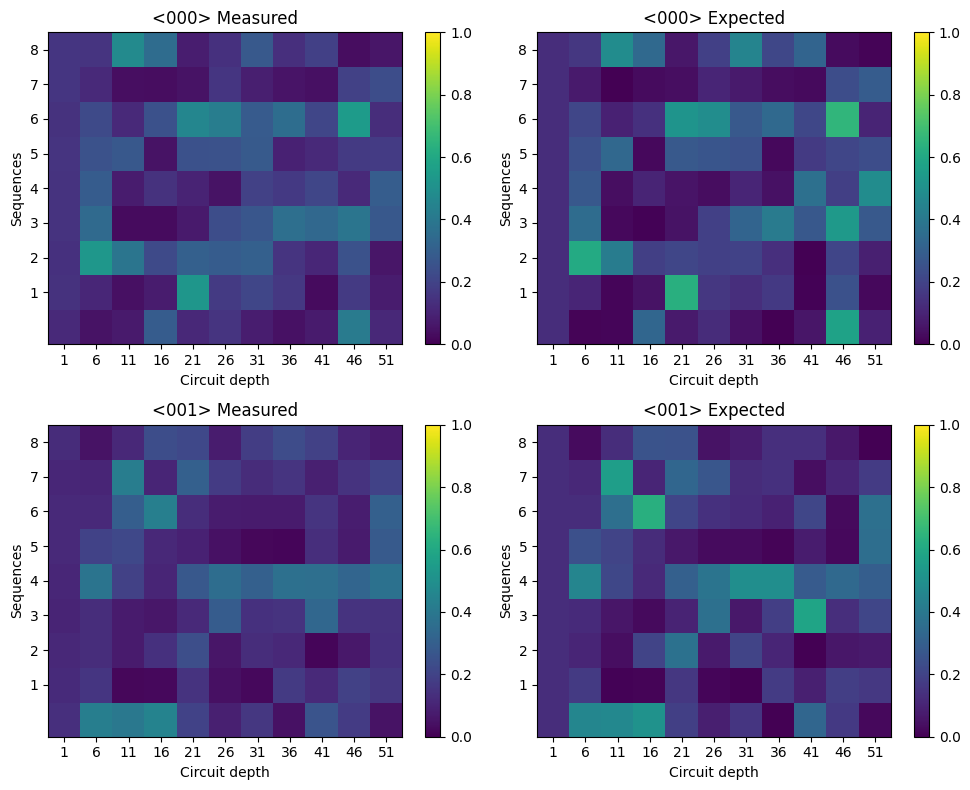

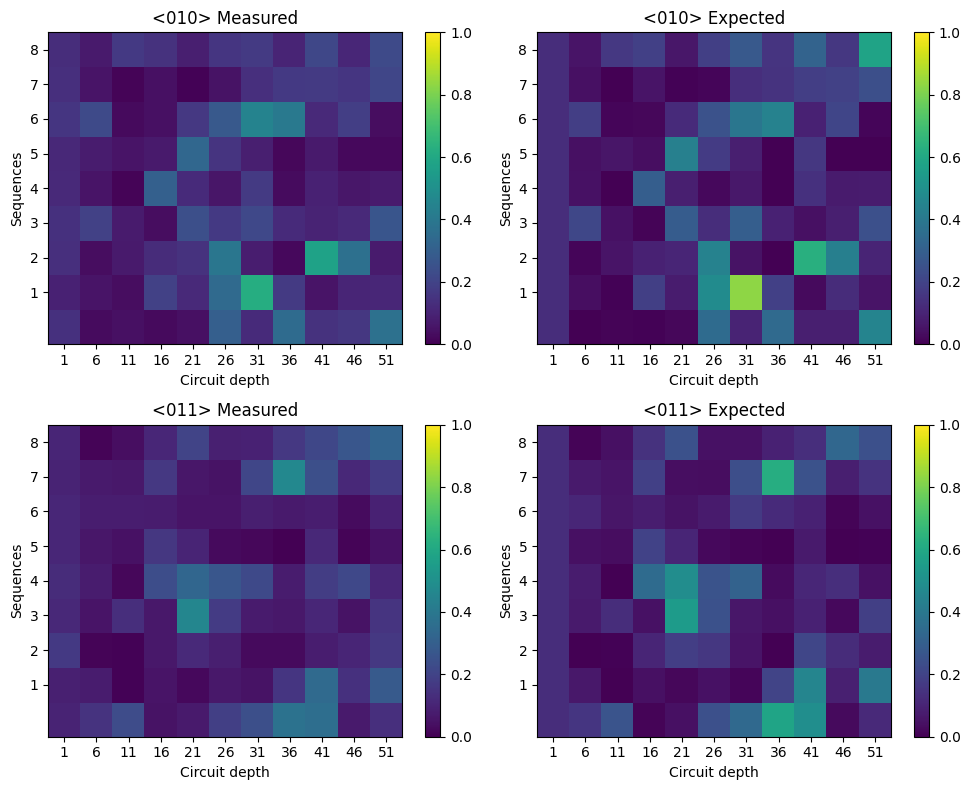

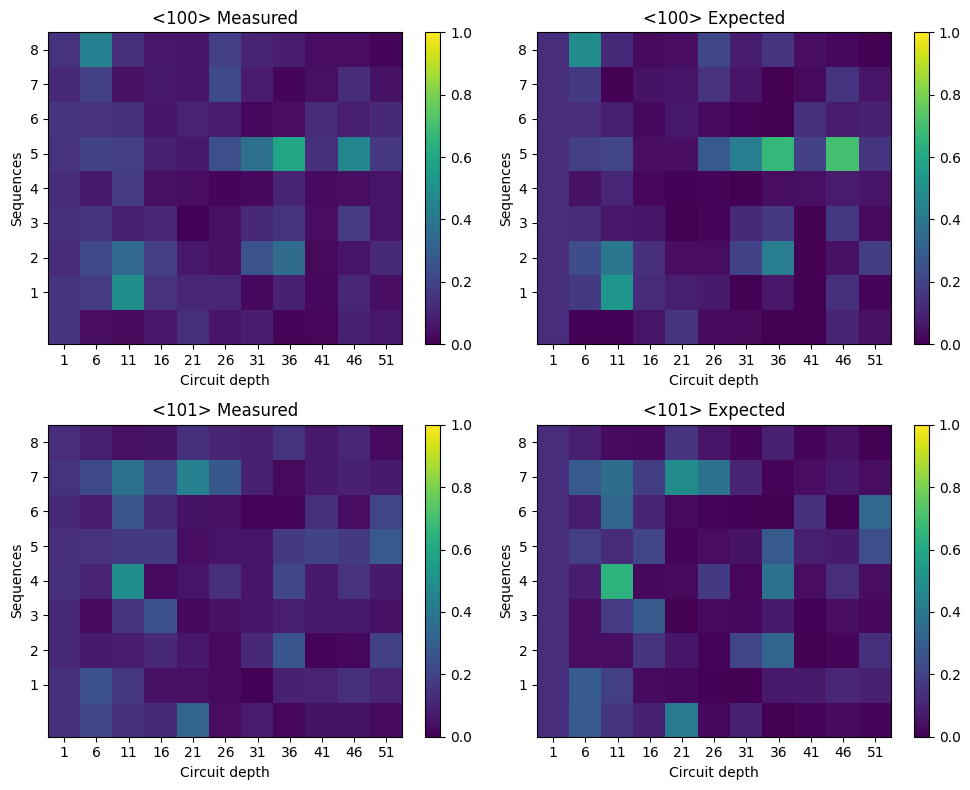

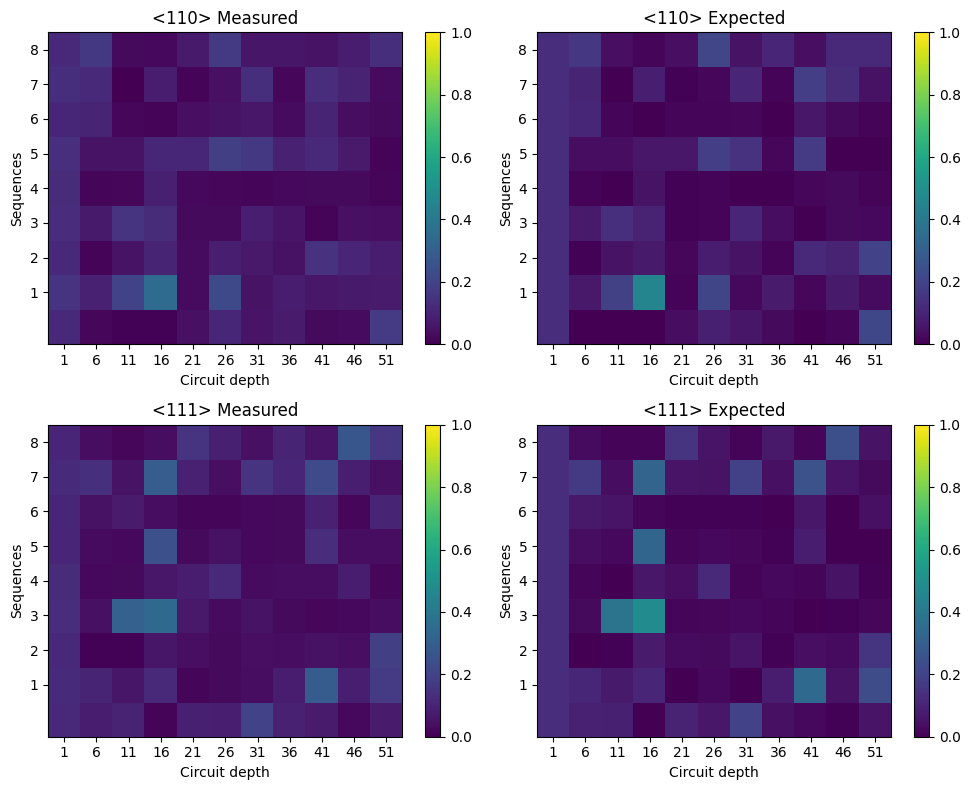

In [2]:
# 1. Extracting Outputs from QPU (QUA, Measured) 
# 2. Extracting recorded Circuits and perform ideal simulation accordingly on CPU (Expected): 
result = job.result()
result.plot_state_heatmap()

In [3]:
xeb.qubits

[Transmon(id='q1', xy=MWChannel(operations={'x180_DragCosine': DragCosinePulse(length=16, id=None, digital_marker='ON', axis_angle=0, amplitude=0.163334816877352, alpha=-1.3101266496425672, anharmonicity=205600000, detuning=-4520000.0), 'x90_DragCosine': DragCosinePulse(length=16, id=None, digital_marker='ON', axis_angle=0, amplitude=0.081667408438676, alpha=-0.8001, anharmonicity=205600000, detuning=0.0), '-x90_DragCosine': DragCosinePulse(length=16, id=None, digital_marker='ON', axis_angle=3.141592653589793, amplitude=0.081667408438676, alpha=-0.8001, anharmonicity=205600000, detuning=-4520000.0), 'y180_DragCosine': DragCosinePulse(length=16, id=None, digital_marker='ON', axis_angle=1.5707963267948966, amplitude=0.163334816877352, alpha=-1.3101266496425672, anharmonicity=205600000, detuning=-4520000.0), 'y90_DragCosine': DragCosinePulse(length=16, id=None, digital_marker='ON', axis_angle=1.5707963267948966, amplitude=0.081667408438676, alpha=-0.8001, anharmonicity=205600000, detuning

/Users/adamachuck/Documents/GitHub/ASQUM/qua-libs/Quantum-Control-Applications-QuAM/Superconducting/quam_libs/experiments/two_qubit_xeb/xeb.py:922: RuntimeWarning: invalid value encountered in scalar divide
  fid_lsq = df["numerator"].sum() / df["denominator"].sum()


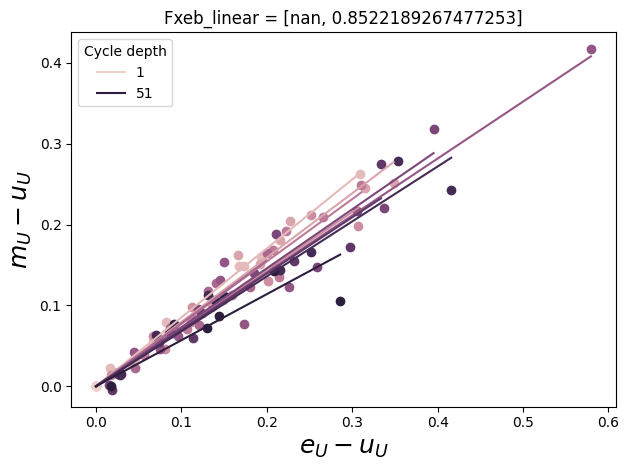

In [3]:
# Compute Fidelities:  
result.plot_records()


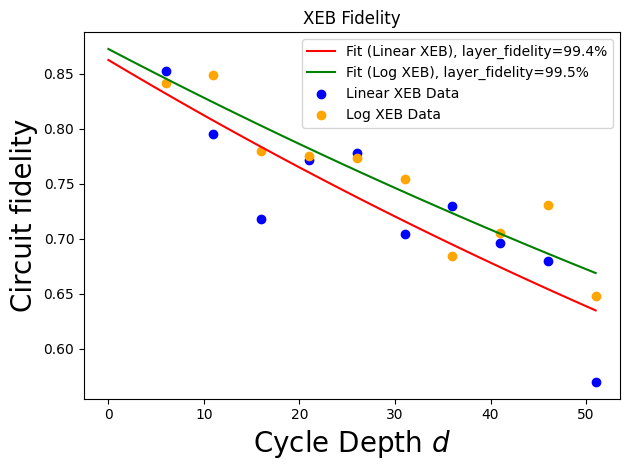

In [5]:
result.plot_fidelities()

In [5]:
# Debugging:  
print(xeb.xeb_config.qubit_pairs)

print(result.saved_data)
      
# print("['counts']['0']: ")
# print(result.saved_data['counts']['0'])

# print("['counts']['1']: ")
# print(result.saved_data['counts']['1'])


[]
{'quadratures': {'I_0': array([[-2.06459260e-05,  3.41339303e-06,  9.57924340e-06,
        -9.78048891e-06,  4.62549818e-05, -9.04610647e-05,
        -7.19832310e-05, -1.00957331e-04, -2.66200091e-05,
        -6.59330562e-05, -7.05108047e-05],
       [-1.64689124e-05, -6.74888226e-05, -1.45836068e-06,
        -7.77537056e-05,  1.99302925e-05,  2.41436703e-05,
         4.23358328e-05, -1.60103823e-05,  5.01169956e-05,
        -5.01890800e-06,  3.61995718e-05],
       [-2.19080171e-05, -6.95919565e-05, -9.18752540e-05,
         2.04093435e-05, -1.04746536e-04, -2.46055105e-05,
        -9.20760578e-05, -6.08349911e-05,  2.10674480e-05,
        -9.91220985e-06, -1.76497815e-05],
       [-1.03593671e-05, -7.18554695e-05, -7.63208419e-05,
        -8.16319138e-05, -9.33347909e-05,  3.34947237e-05,
        -8.46972050e-05, -9.94425799e-06, -2.26301327e-05,
         3.11926433e-05, -6.88598890e-05],
       [-1.74049448e-05, -2.78242092e-05,  1.28327204e-06,
         7.67163773e-05,  2.713464

In [6]:
print([readout.operations["readout"].threshold for readout in xeb.readout_channels])

[-1.4049370966234228e-05, -0.0001454889195135424]


In [5]:
# result.saved_data["states"]
result.saved_data["amp_matrix_q0"]

KeyError: 'amp_matrix_q0'